# 課程目標:
    
    了解MLP 在神經網路上的應用

# 範例重點:
    以Keras 自帶的 手寫辨識的數據集來說明 MLP 建構的網路模型

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label), (x_test_image,y_test_label)= mnist.load_data()

In [5]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [16]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [17]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
#宣告採用序列模型
model = Sequential()

W0714 21:21:09.772986  5284 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [24]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

W0714 21:21:20.802163  5284 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 21:21:20.805161  5284 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.



In [25]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [26]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [27]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

W0714 21:21:35.006782  5284 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0714 21:21:35.037701  5284 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [28]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

W0714 21:21:46.726464  5284 deprecation.py:323] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0714 21:21:46.791291  5284 deprecation_wrapper.py:119] From C:\Users\Sims_Home\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 164us/step - loss: 0.2698 - acc: 0.9225 - val_loss: 0.1310 - val_acc: 0.9623
Epoch 2/10
48000/48000 [==============================] - 8s 172us/step - loss: 0.1079 - acc: 0.9684 - val_loss: 0.1041 - val_acc: 0.9688
Epoch 3/10
48000/48000 [==============================] - 8s 174us/step - loss: 0.0713 - acc: 0.9787 - val_loss: 0.0940 - val_acc: 0.9710
Epoch 4/10
48000/48000 [==============================] - 8s 169us/step - loss: 0.0515 - acc: 0.9836 - val_loss: 0.0794 - val_acc: 0.9758
Epoch 5/10
48000/48000 [==============================] - 8s 166us/step - loss: 0.0369 - acc: 0.9885 - val_loss: 0.0826 - val_acc: 0.9746
Epoch 6/10
48000/48000 [==============================] - 8s 158us/step - loss: 0.0263 - acc: 0.9917 - val_loss: 0.0777 - val_acc: 0.9773
Epoch 7/10
48000/48000 [==============================] - 8s 159us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.0889 - 

# 以圖形顯示訓練過程

In [29]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

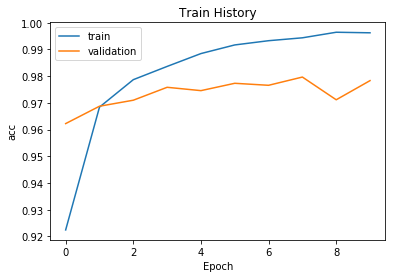

In [30]:
show_train_history(train_history,'acc','val_acc')

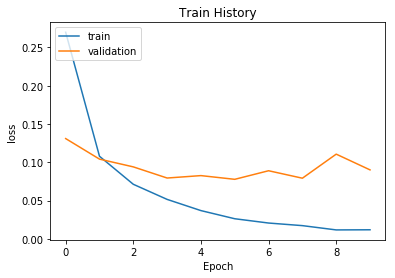

In [31]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [32]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 0s 28us/step

accuracy= 0.9798


# 參考資料

### 機器學習 - 神經網路 (多層感知機 Multilayer perceptron, MLP) 運作方式
文章連結：[Medium](shorturl.at/oH234)

[多層感知機](https://zh.wikipedia.org/wiki/%E5%A4%9A%E5%B1%82%E6%84%9F%E7%9F%A5%E5%99%A8)

## 延伸閱讀: 應用於 regression
一條線不夠, 用二條線
![](https://ai100-fileentity.cupoy.com/2nd/homework/D70/1562228827755/large)